# **import**

In [2]:
import random
import os
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.preprocessing import LabelEncoder
from matplotlib.dates import DateFormatter, MonthLocator

import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [4]:
train_data = pd.read_csv('/content/data/train.csv').drop(columns=['ID'])
sales = pd.read_csv('/content/data/sales.csv').drop(columns=['ID'])
keyword = pd.read_csv('/content/data/brand_keyword_cnt.csv')
product_info = pd.read_csv('/content/data/product_info.csv')

In [5]:
train_data

,제품,대분류,중분류,소분류,브랜드,쇼핑몰,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-04-15,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24
0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,0,...,2,0,2,0,2,2,1,0,0,0
2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B002-00002-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00010,0,0,0,0,...,10,6,4,4,4,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28889,B002-03798-00046,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28890,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28891,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,S001-00001,0,0,0,0,...,2,4,1,0,0,0,4,0,2,0
28892,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
sales

,제품,대분류,중분류,소분류,브랜드,쇼핑몰,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-04-15,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24
0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,0,...,44800,0,44800,0,44800,44800,22400,0,0,0
2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B002-00002-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00010,0,0,0,0,...,45740,28360,17320,19200,19200,0,0,0,0,41800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28889,B002-03798-00046,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28890,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28891,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,S001-00001,0,0,0,0,...,40460,80920,20230,0,0,0,80920,0,40460,0
28892,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,S001-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# print info
def report(data):
    col = []
    d_type = []
    uniques = []
    n_uniques = []

    for i in data.columns:
        col.append(i)
        d_type.append(data[i].dtypes)
        uniques.append(data[i].unique()[:5])
        n_uniques.append(data[i].nunique())

    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [8]:
report(train_data)

,Column,d_type,unique_sample,n_uniques
0,제품,object,"[B002-00001-00001, B002-00002-00001, B002-0000...",13896
1,대분류,object,"[B002-C001-0002, B002-C001-0003, B002-C001-000...",5
2,중분류,object,"[B002-C002-0007, B002-C002-0008, B002-C002-000...",11
3,소분류,object,"[B002-C003-0038, B002-C003-0044, B002-C003-000...",53
4,브랜드,object,"[B002-00001, B002-00002, B002-00003, B002-0000...",2895
...,...,...,...,...
480,2023-04-20,int64,"[0, 2, 45, 8, 16]",378
481,2023-04-21,int64,"[0, 1, 2, 5, 3]",357
482,2023-04-22,int64,"[0, 2, 50, 6, 36]",320
483,2023-04-23,int64,"[0, 20, 5, 1, 8]",316


## **Sales data**

In [9]:
sales = sales.melt(id_vars=['제품','대분류', '중분류', '소분류', '브랜드', '쇼핑몰'], var_name='date', value_name='value')

In [10]:
sales

,제품,대분류,중분류,소분류,브랜드,쇼핑몰,date,value
0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,S001-00001,2022-01-01,0
1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,2022-01-01,0
2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,2022-01-01,0
3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,2022-01-01,0
4,B002-00002-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00010,2022-01-01,0
...,...,...,...,...,...,...,...,...
13840221,B002-03798-00046,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,S001-00001,2023-04-24,0
13840222,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,S001-00001,2023-04-24,0
13840223,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,S001-00001,2023-04-24,0
13840224,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,S001-00001,2023-04-24,0


## **Train data**

In [11]:
train_data = train_data.melt(id_vars=['제품','대분류', '중분류', '소분류', '브랜드', '쇼핑몰'], var_name='date', value_name='value')

## **Keyword data**

In [12]:
keyword = keyword.melt(id_vars=['브랜드'], var_name='date')

In [13]:
keyword

,브랜드,date,value
0,B002-00001,2022-01-01,0.841310
1,B002-00002,2022-01-01,12.648680
2,B002-00003,2022-01-01,0.333620
3,B002-00004,2022-01-01,0.130540
4,B002-00005,2022-01-01,1.073390
...,...,...,...
1830733,B002-03818,2023-04-24,0.232076
1830734,B002-03819,2023-04-24,0.000000
1830735,B002-03820,2023-04-24,0.000000
1830736,B002-03821,2023-04-24,12.895343


# EDA

## **Categorical count**

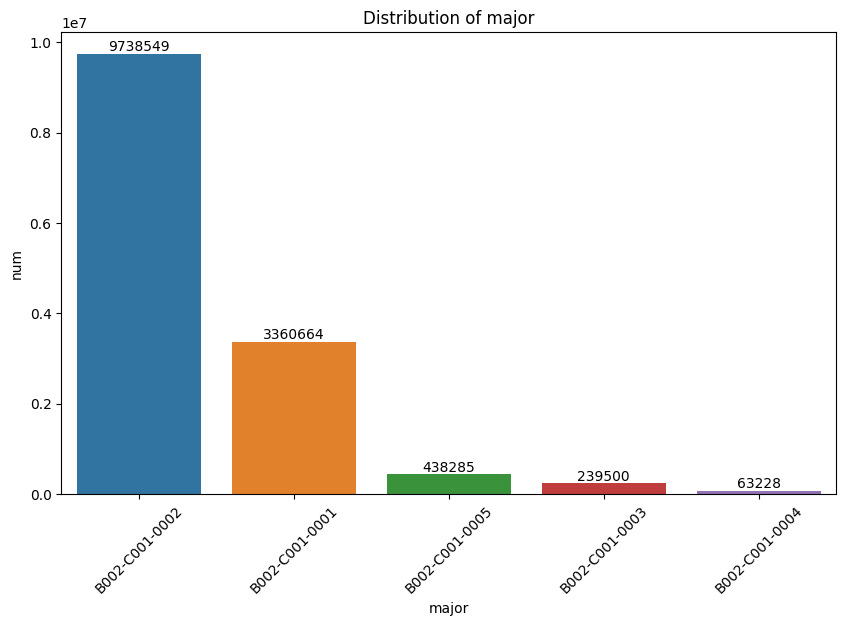

In [14]:
category_counts = train_data['대분류'].value_counts()

# 대분류별 데이터 수를 바 그래프로 표시
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)


# 데이터 값을 그래프에 함께 표시
for i, v in enumerate(category_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Distribution of major')
plt.xlabel('major')
plt.ylabel('num')
plt.xticks(rotation=45)
plt.show()

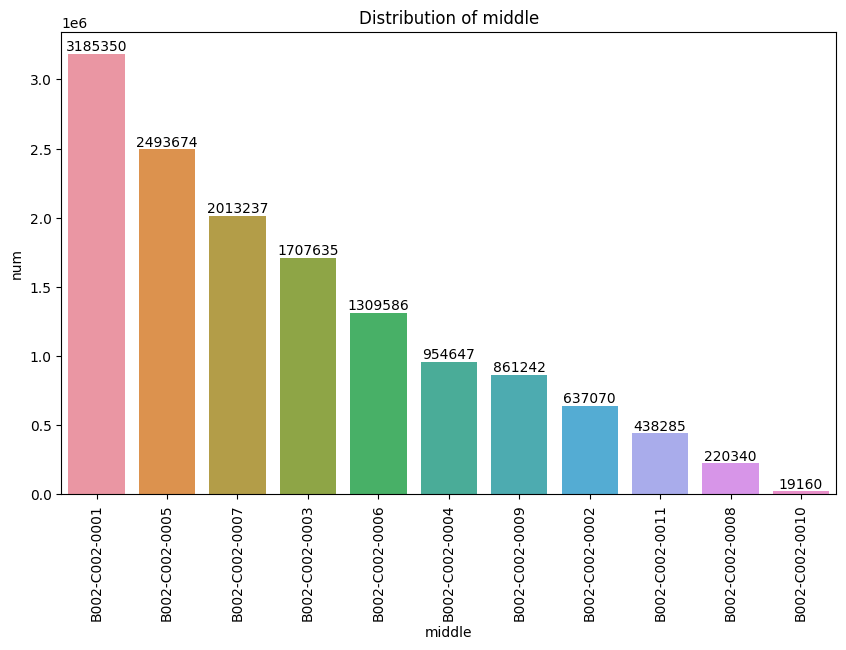

In [15]:
category_counts = train_data['중분류'].value_counts()

# 대분류별 데이터 수를 바 그래프로 표시
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)

# 데이터 값을 그래프에 함께 표시
for i, v in enumerate(category_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Distribution of middle')
plt.xlabel('middle')
plt.ylabel('num')
plt.xticks(rotation=90)
plt.show()

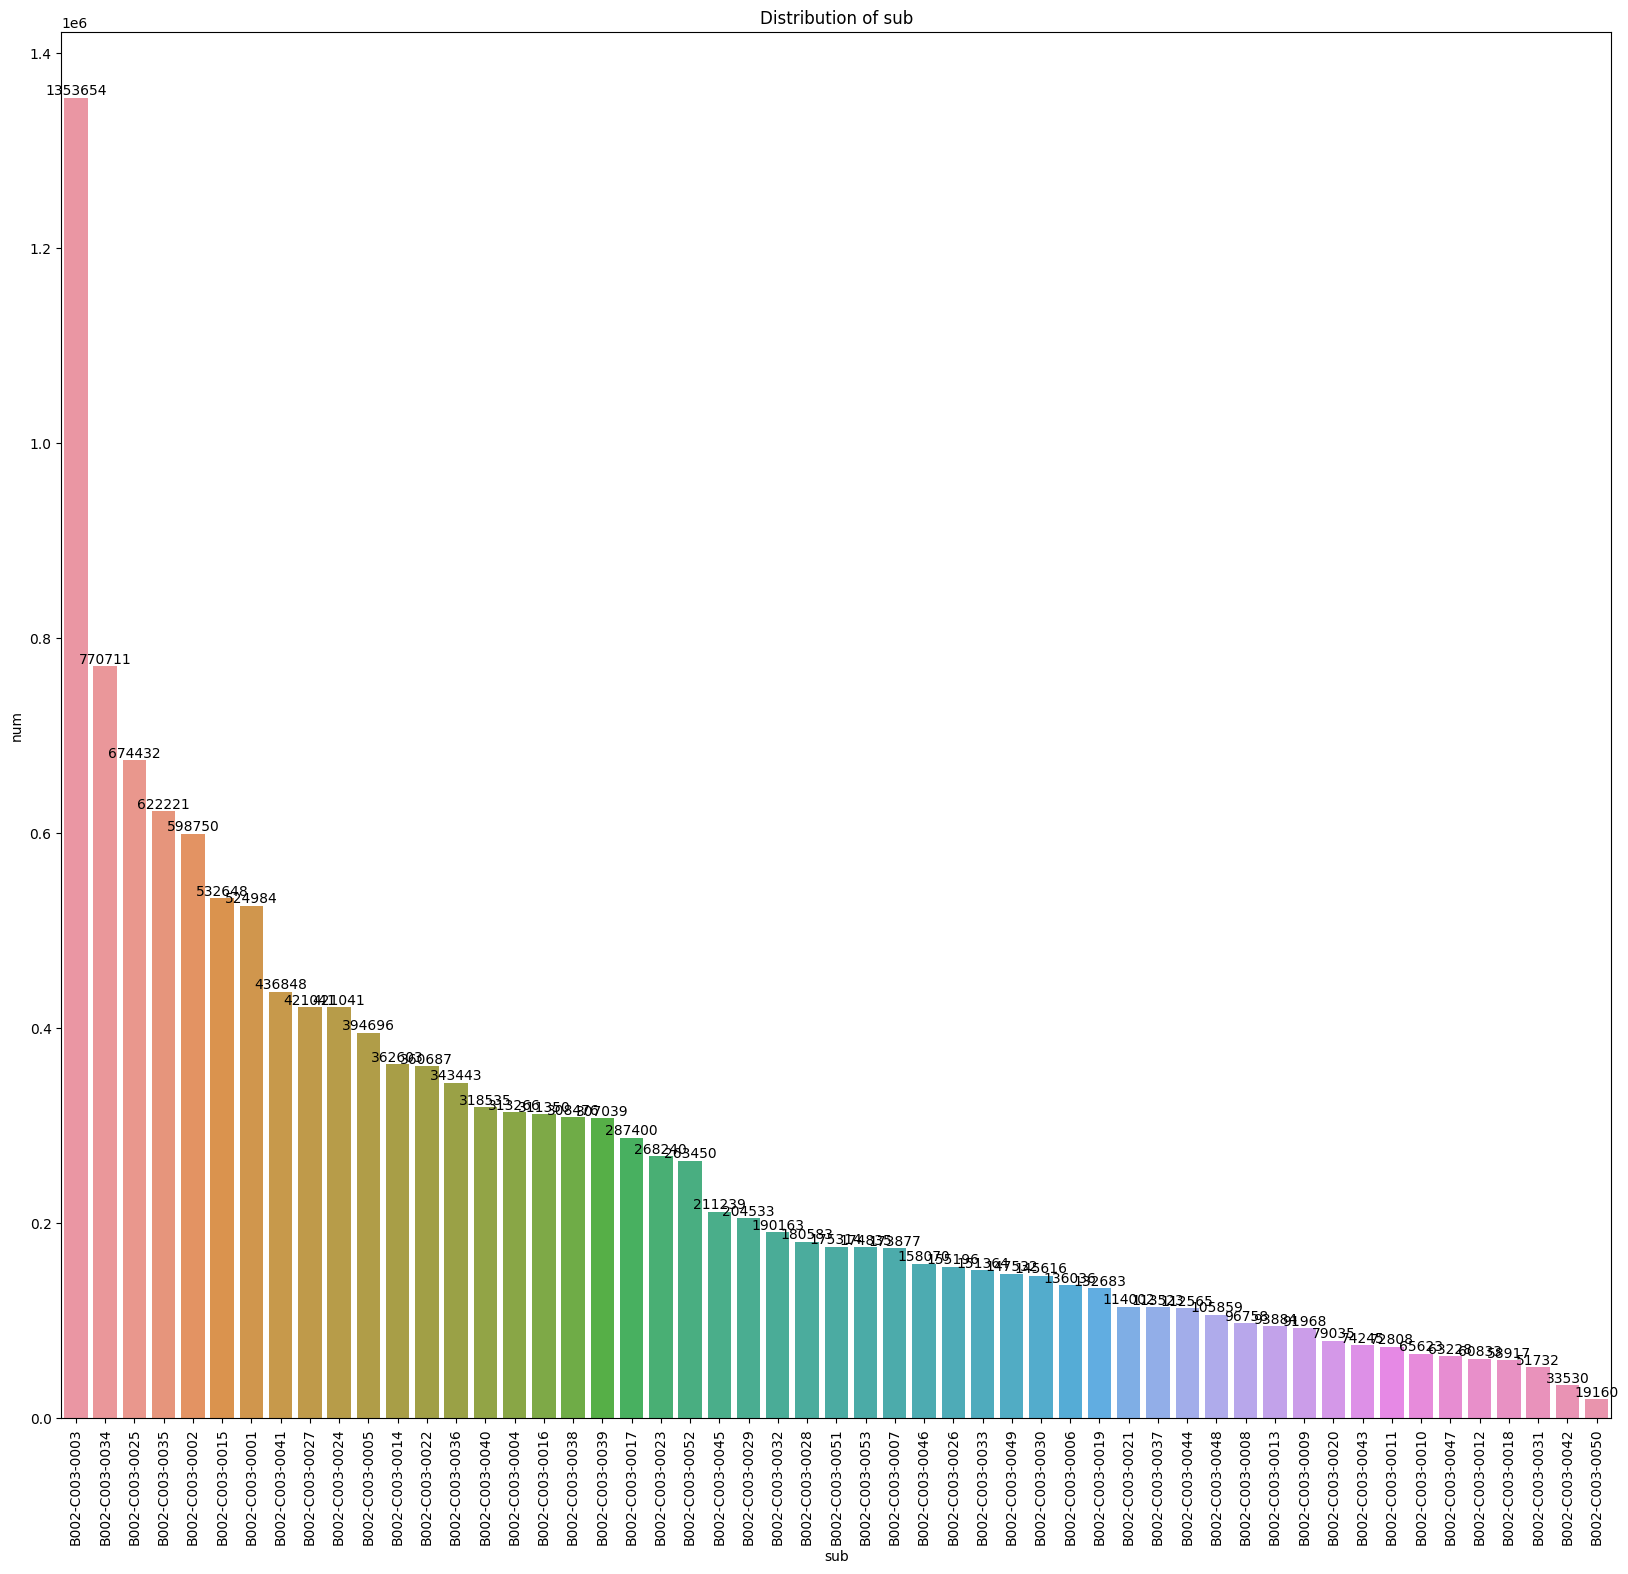

In [16]:
category_counts = train_data['소분류'].value_counts()

# 대분류별 데이터 수를 바 그래프로 표시
plt.figure(figsize=(20, 18))
sns.barplot(x=category_counts.index, y=category_counts.values)

# 데이터 값을 그래프에 함께 표시
for i, v in enumerate(category_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Distribution of sub')
plt.xlabel('sub')
plt.ylabel('num')
plt.xticks(rotation=90)
plt.show()

## **All**

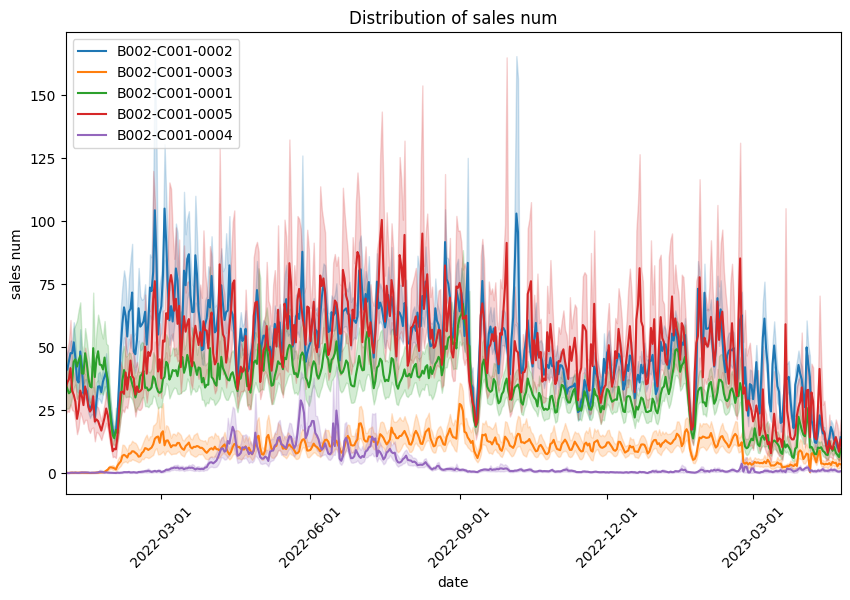

In [17]:
train_data['date'] = pd.to_datetime(train_data['date'])

# 대분류 소비재 별 판매량 분포
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_data, x=train_data['date'], y=train_data['value'], hue=train_data['대분류'])
plt.title('Distribution of sales num')
plt.xlabel('date')
plt.ylabel('sales num')

# Set the x-axis to display every 3 months
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Set the x-axis limits based on the actual date range in the 'train_data' DataFrame
xmin = train_data['date'].min()
xmax = train_data['date'].max()
plt.xlim(xmin, xmax)

plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

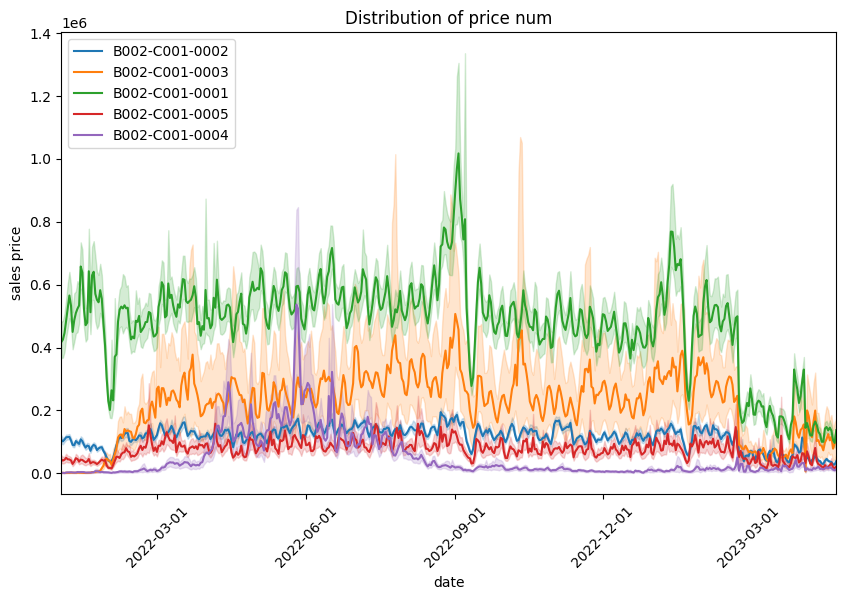

In [18]:
sales['date'] = pd.to_datetime(sales['date'])

# 대분류 소비재 별 판매가격 분포
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales, x=sales['date'], y=sales['value'], hue=sales['대분류'])
plt.title('Distribution of price num')
plt.xlabel('date')
plt.ylabel('sales price')

# Set the x-axis to display every 3 months
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Set the x-axis limits based on the actual date range in the 'train_data' DataFrame
xmin = train_data['date'].min()
xmax = train_data['date'].max()
plt.xlim(xmin, xmax)

plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()


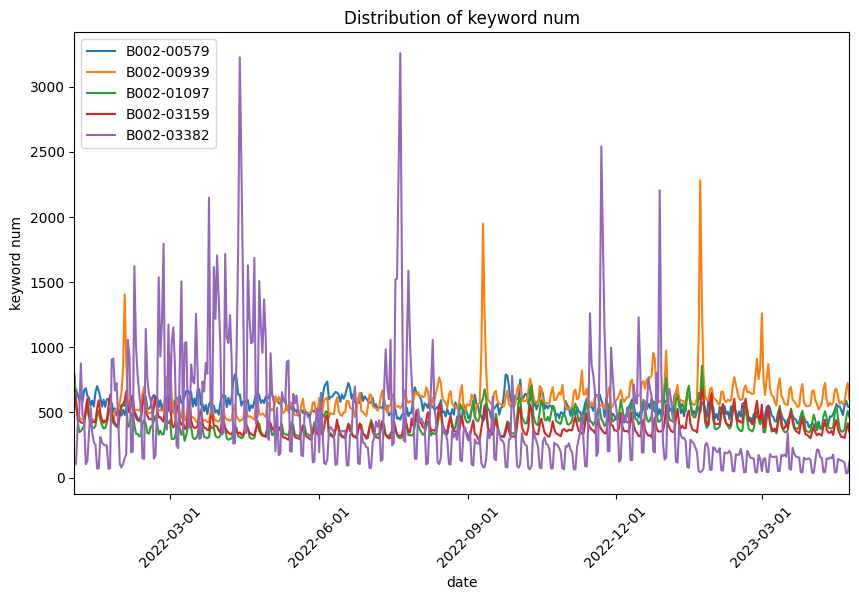

In [19]:
# 브랜드
keyword['date'] = pd.to_datetime(keyword['date'])
brand_sales = keyword.groupby('브랜드')['value'].sum().reset_index()

# Sort the brands based on their sales values
sorted_brands = brand_sales.sort_values(by='value', ascending=False)

# Select the top 3 and bottom 3 brands
top_3_brands = sorted_brands.head(5)

# Filter the 'keyword' DataFrame to include only the top and bottom brands
selected_brands = keyword[keyword['브랜드'].isin(top_3_brands['브랜드'])]

# Plot the data for the selected brands
plt.figure(figsize=(10, 6))
sns.lineplot(data=selected_brands, x='date', y='value', hue='브랜드')
plt.title('Distribution of keyword num')
plt.xlabel('date')
plt.ylabel('keyword num')

# Set the x-axis to display every 3 months
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Set the x-axis limits based on the actual date range in the 'train_data' DataFrame
xmin = selected_brands['date'].min()
xmax = selected_brands['date'].max()
plt.xlim(xmin, xmax)

plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

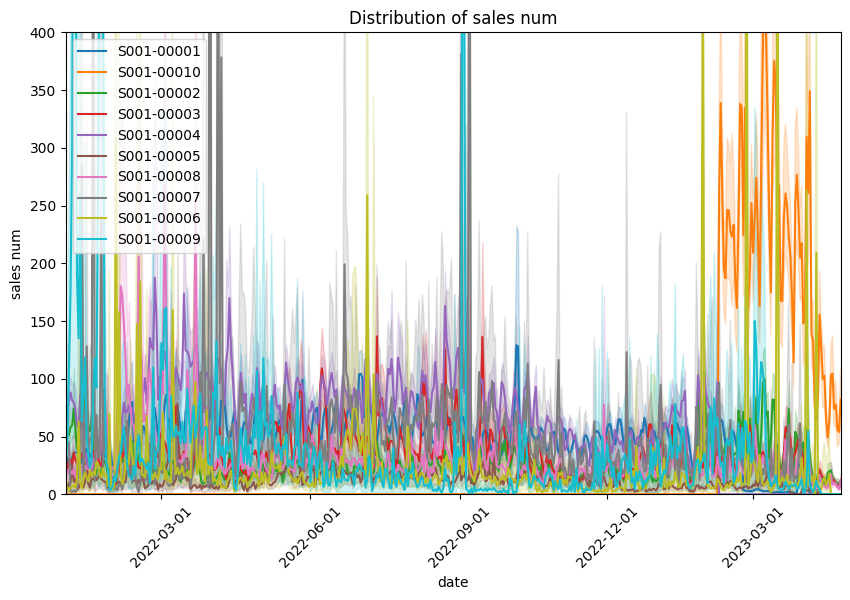

In [20]:
train_data['date'] = pd.to_datetime(train_data['date'])

# 쇼핑몰 소비재 별 판매량 분포
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_data, x=train_data['date'], y=train_data['value'], hue=train_data['쇼핑몰'])
plt.title('Distribution of sales num')
plt.xlabel('date')
plt.ylabel('sales num')

# Set the x-axis to display every 3 months
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Set the x-axis limits based on the actual date range in the 'train_data' DataFrame
xmin = train_data['date'].min()
xmax = train_data['date'].max()
plt.xlim(xmin, xmax)

# Set the y-axis limits to a maximum of 1000
plt.ylim(0, 400)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [23]:
# keyword 총 합
brand_sales = keyword.groupby('브랜드')['value'].sum().reset_index()

# keyword 합 기준으로 브랜드 정렬
sorted_brands = brand_sales.sort_values(by='value', ascending=False)

# 0보다 큰 판매량을 가진 브랜드만 선택
selected_brands = sorted_brands[sorted_brands['value'] > 0]

# Filter the 'keyword' DataFrame to include only the top and bottom brands
selected_brands = keyword[keyword['브랜드'].isin(selected_brands['브랜드'])]

selected_brands

,브랜드,date,value
0,B002-00001,2022-01-01,0.841310
1,B002-00002,2022-01-01,12.648680
2,B002-00003,2022-01-01,0.333620
3,B002-00004,2022-01-01,0.130540
4,B002-00005,2022-01-01,1.073390
...,...,...,...
1830733,B002-03818,2023-04-24,0.232076
1830734,B002-03819,2023-04-24,0.000000
1830735,B002-03820,2023-04-24,0.000000
1830736,B002-03821,2023-04-24,12.895343


## **소비재별 EDA**

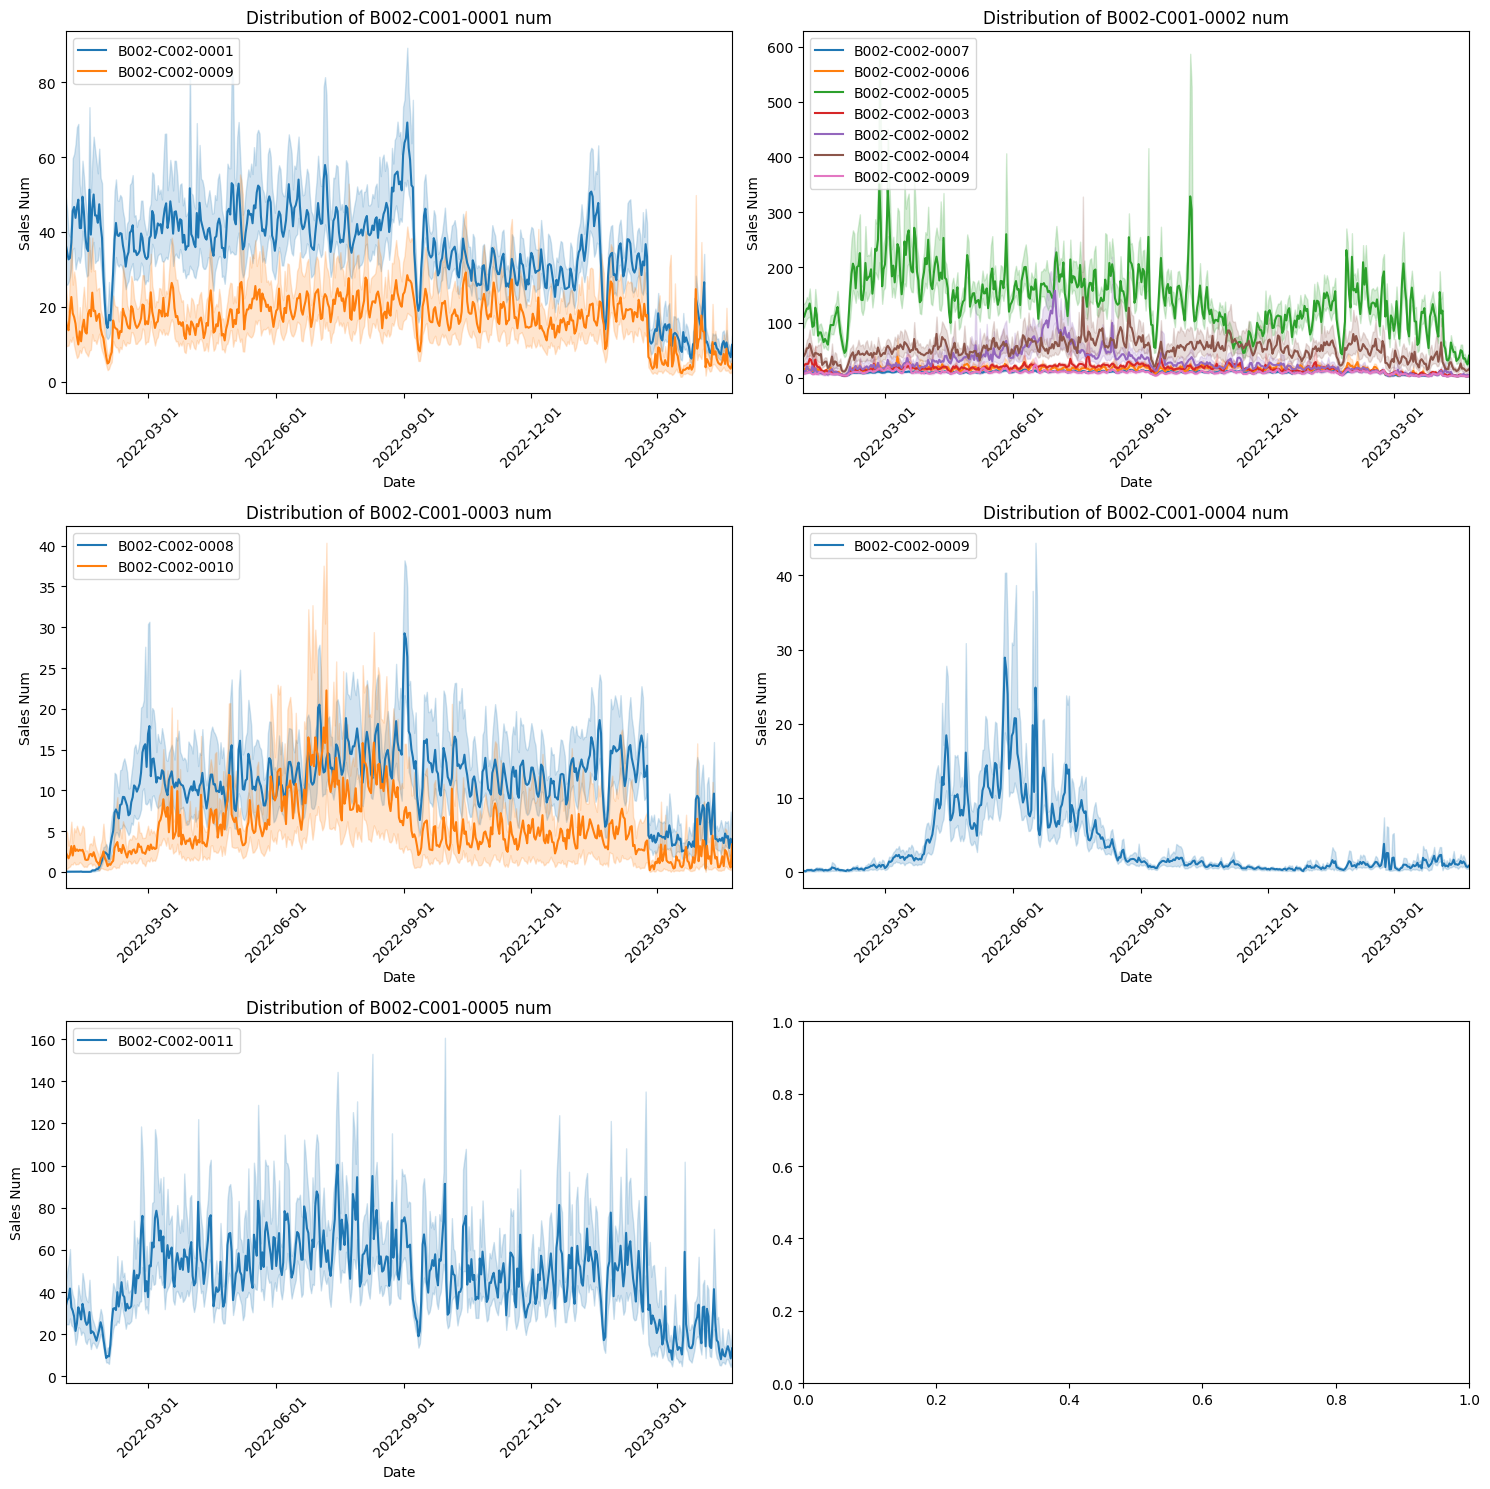

In [21]:
# 대분류 list 생성
b_cat = list(train_data['대분류'].unique())
b_cat.sort()

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, category in enumerate(b_cat):
    train_max = train_data[train_data['대분류'] == category]

    # Calculate the row and column index for the current subplot
    row_idx = i // 2
    col_idx = i % 2

    # Plot the data in the current subplot
    sns.lineplot(data=train_max, x='date', y='value', hue='중분류', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {category} num')
    axes[row_idx, col_idx].set_xlabel('Date')
    axes[row_idx, col_idx].set_ylabel('Sales Num')

    # Set the x-axis to display every 3 months
    axes[row_idx, col_idx].xaxis.set_major_locator(MonthLocator(interval=3))
    axes[row_idx, col_idx].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

    # Set the x-axis limits based on the actual date range in the 'train_data' DataFrame
    xmin = train_max['date'].min()
    xmax = train_max['date'].max()
    axes[row_idx, col_idx].set_xlim(xmin, xmax)

    axes[row_idx, col_idx].tick_params(axis='x', rotation=45)
    axes[row_idx, col_idx].legend(loc='upper left')

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

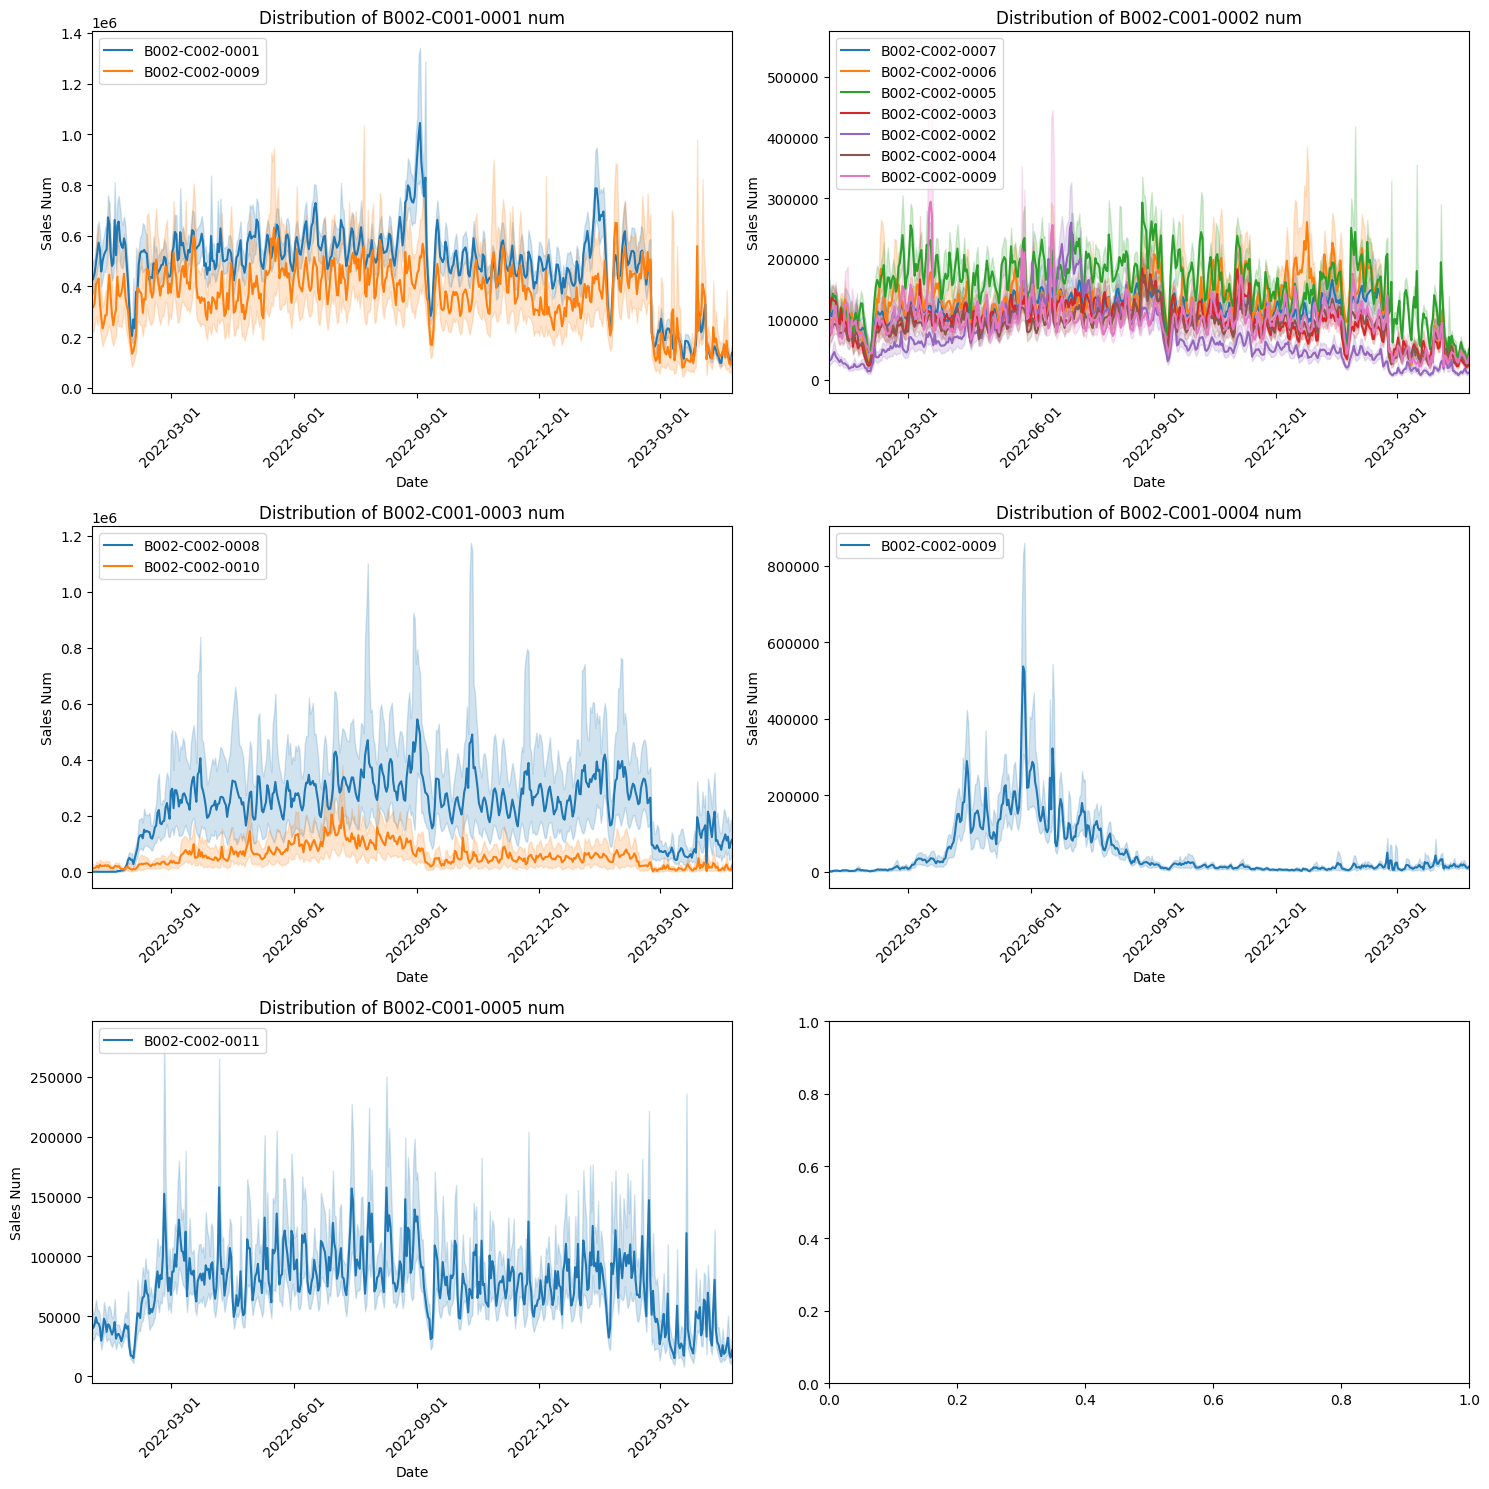

In [22]:
# 대분류 list 생성
b_cat = list(sales['대분류'].unique())
b_cat.sort()

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, category in enumerate(b_cat):
    train_max = sales[sales['대분류'] == category]

    # Calculate the row and column index for the current subplot
    row_idx = i // 2
    col_idx = i % 2

    # Plot the data in the current subplot
    sns.lineplot(data=train_max, x='date', y='value', hue='중분류', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {category} num')
    axes[row_idx, col_idx].set_xlabel('Date')
    axes[row_idx, col_idx].set_ylabel('Sales Num')

    # Set the x-axis to display every 3 months
    axes[row_idx, col_idx].xaxis.set_major_locator(MonthLocator(interval=3))
    axes[row_idx, col_idx].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

    # Set the x-axis limits based on the actual date range in the 'train_data' DataFrame
    xmin = train_max['date'].min()
    xmax = train_max['date'].max()
    axes[row_idx, col_idx].set_xlim(xmin, xmax)

    axes[row_idx, col_idx].tick_params(axis='x', rotation=45)
    axes[row_idx, col_idx].legend(loc='upper left')

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()